# Downloading SWOT from PODAAC

In [11]:
from importlib import reload
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from cartopy import crs as ccrs

import xarray

from remote_sensing.download import podaac
from remote_sensing.healpix import rs_healpix
from remote_sensing.netcdf import utils as nc_utils
from remote_sensing.process import swot_ssh_utils

In [2]:
lon_lim = (127.,134)
lat_lim = (18.,23)

# Prep

# Lets grab the file list last 10 days worth of SWOT data in the western Pacific Ocean

In [7]:
reload(podaac)
data_files, checksums = podaac.grab_file_list('SWOT_L2_LR_SSH_EXPERT_2.0', dt_past=dict(days=10),
                                             bbox=f"{lon_lim[0]},{lat_lim[0]},{lon_lim[1]},{lat_lim[1]}")

In [8]:
data_files

['https://archive.swot.podaac.earthdata.nasa.gov/podaac-swot-ops-cumulus-protected/SWOT_L2_LR_SSH_2.0/SWOT_L2_LR_SSH_Expert_028_116_20250207T162718_20250207T171804_PIC2_01.nc',
 'https://archive.swot.podaac.earthdata.nasa.gov/podaac-swot-ops-cumulus-protected/SWOT_L2_LR_SSH_2.0/SWOT_L2_LR_SSH_Expert_028_088_20250206T162647_20250206T171733_PIC2_01.nc',
 'https://archive.swot.podaac.earthdata.nasa.gov/podaac-swot-ops-cumulus-protected/SWOT_L2_LR_SSH_2.0/SWOT_L2_LR_SSH_Expert_028_078_20250206T075219_20250206T084347_PIC2_01.nc',
 'https://archive.swot.podaac.earthdata.nasa.gov/podaac-swot-ops-cumulus-protected/SWOT_L2_LR_SSH_2.0/SWOT_L2_LR_SSH_Expert_028_060_20250205T162617_20250205T171702_PIC2_01.nc',
 'https://archive.swot.podaac.earthdata.nasa.gov/podaac-swot-ops-cumulus-protected/SWOT_L2_LR_SSH_2.0/SWOT_L2_LR_SSH_Expert_028_047_20250205T051825_20250205T060856_PIC2_01.nc',
 'https://archive.swot.podaac.earthdata.nasa.gov/podaac-swot-ops-cumulus-protected/SWOT_L2_LR_SSH_2.0/SWOT_L2_LR_SS

# Now let's download them 

## The default folder is $\$$OS_RS/PODAAC/collection 

### where $\$$OS_RS is an environmental variable you need to set  
### and "collection" is the PODAAC resolved 

## If it $\$$OS_RS isn't set then the path will be ./PODAAC/collection

In [12]:
reload(podaac)
podaac.download_files(data_files)

Using default download directory: /home/xavier/Projects/Oceanography/data/Remote_Sensing/PODAAC
Creating directory: /home/xavier/Projects/Oceanography/data/Remote_Sensing/PODAAC/SWOT_L2_LR_SSH_2.0
File downloaded: /home/xavier/Projects/Oceanography/data/Remote_Sensing/PODAAC/SWOT_L2_LR_SSH_2.0/SWOT_L2_LR_SSH_Expert_028_116_20250207T162718_20250207T171804_PIC2_01.nc
File downloaded: /home/xavier/Projects/Oceanography/data/Remote_Sensing/PODAAC/SWOT_L2_LR_SSH_2.0/SWOT_L2_LR_SSH_Expert_028_088_20250206T162647_20250206T171733_PIC2_01.nc
File downloaded: /home/xavier/Projects/Oceanography/data/Remote_Sensing/PODAAC/SWOT_L2_LR_SSH_2.0/SWOT_L2_LR_SSH_Expert_028_078_20250206T075219_20250206T084347_PIC2_01.nc
File downloaded: /home/xavier/Projects/Oceanography/data/Remote_Sensing/PODAAC/SWOT_L2_LR_SSH_2.0/SWOT_L2_LR_SSH_Expert_028_060_20250205T162617_20250205T171702_PIC2_01.nc
File downloaded: /home/xavier/Projects/Oceanography/data/Remote_Sensing/PODAAC/SWOT_L2_LR_SSH_2.0/SWOT_L2_LR_SSH_Expert

['/home/xavier/Projects/Oceanography/data/Remote_Sensing/PODAAC/SWOT_L2_LR_SSH_2.0/SWOT_L2_LR_SSH_Expert_028_116_20250207T162718_20250207T171804_PIC2_01.nc',
 '/home/xavier/Projects/Oceanography/data/Remote_Sensing/PODAAC/SWOT_L2_LR_SSH_2.0/SWOT_L2_LR_SSH_Expert_028_088_20250206T162647_20250206T171733_PIC2_01.nc',
 '/home/xavier/Projects/Oceanography/data/Remote_Sensing/PODAAC/SWOT_L2_LR_SSH_2.0/SWOT_L2_LR_SSH_Expert_028_078_20250206T075219_20250206T084347_PIC2_01.nc',
 '/home/xavier/Projects/Oceanography/data/Remote_Sensing/PODAAC/SWOT_L2_LR_SSH_2.0/SWOT_L2_LR_SSH_Expert_028_060_20250205T162617_20250205T171702_PIC2_01.nc',
 '/home/xavier/Projects/Oceanography/data/Remote_Sensing/PODAAC/SWOT_L2_LR_SSH_2.0/SWOT_L2_LR_SSH_Expert_028_047_20250205T051825_20250205T060856_PIC2_01.nc',
 '/home/xavier/Projects/Oceanography/data/Remote_Sensing/PODAAC/SWOT_L2_LR_SSH_2.0/SWOT_L2_LR_SSH_Expert_028_019_20250204T051758_20250204T060825_PIC2_01.nc',
 '/home/xavier/Projects/Oceanography/data/Remote_Sen

## If we try again, we get:

In [13]:
podaac.download_files(data_files)

Using default download directory: /home/xavier/Projects/Oceanography/data/Remote_Sensing/PODAAC
File exists: SWOT_L2_LR_SSH_Expert_028_116_20250207T162718_20250207T171804_PIC2_01.nc
  --- Use clobber=True to overwrite
File exists: SWOT_L2_LR_SSH_Expert_028_088_20250206T162647_20250206T171733_PIC2_01.nc
  --- Use clobber=True to overwrite
File exists: SWOT_L2_LR_SSH_Expert_028_078_20250206T075219_20250206T084347_PIC2_01.nc
  --- Use clobber=True to overwrite
File exists: SWOT_L2_LR_SSH_Expert_028_060_20250205T162617_20250205T171702_PIC2_01.nc
  --- Use clobber=True to overwrite
File exists: SWOT_L2_LR_SSH_Expert_028_047_20250205T051825_20250205T060856_PIC2_01.nc
  --- Use clobber=True to overwrite
File exists: SWOT_L2_LR_SSH_Expert_028_019_20250204T051758_20250204T060825_PIC2_01.nc
  --- Use clobber=True to overwrite
File exists: SWOT_L2_LR_SSH_Expert_027_575_20250203T051626_20250203T060755_PIC2_01.nc
  --- Use clobber=True to overwrite
Downloaded 0 files, failed on 0 files, skipped 7 e

['/home/xavier/Projects/Oceanography/data/Remote_Sensing/PODAAC/SWOT_L2_LR_SSH_2.0/SWOT_L2_LR_SSH_Expert_028_116_20250207T162718_20250207T171804_PIC2_01.nc',
 '/home/xavier/Projects/Oceanography/data/Remote_Sensing/PODAAC/SWOT_L2_LR_SSH_2.0/SWOT_L2_LR_SSH_Expert_028_088_20250206T162647_20250206T171733_PIC2_01.nc',
 '/home/xavier/Projects/Oceanography/data/Remote_Sensing/PODAAC/SWOT_L2_LR_SSH_2.0/SWOT_L2_LR_SSH_Expert_028_078_20250206T075219_20250206T084347_PIC2_01.nc',
 '/home/xavier/Projects/Oceanography/data/Remote_Sensing/PODAAC/SWOT_L2_LR_SSH_2.0/SWOT_L2_LR_SSH_Expert_028_060_20250205T162617_20250205T171702_PIC2_01.nc',
 '/home/xavier/Projects/Oceanography/data/Remote_Sensing/PODAAC/SWOT_L2_LR_SSH_2.0/SWOT_L2_LR_SSH_Expert_028_047_20250205T051825_20250205T060856_PIC2_01.nc',
 '/home/xavier/Projects/Oceanography/data/Remote_Sensing/PODAAC/SWOT_L2_LR_SSH_2.0/SWOT_L2_LR_SSH_Expert_028_019_20250204T051758_20250204T060825_PIC2_01.nc',
 '/home/xavier/Projects/Oceanography/data/Remote_Sen

# Let's examine one

In [3]:
ds_file = '/home/xavier/Projects/Oceanography/data/Remote_Sensing/PODAAC/SWOT_L2_LR_SSH_2.0/SWOT_L2_LR_SSH_Expert_028_116_20250207T162718_20250207T171804_PIC2_01.nc'
ds = xarray.open_dataset(ds_file)
ds

<xarray.Dataset> Size: 400MB
Dimensions:                                (num_lines: 9866, num_pixels: 69,
                                            num_sides: 2)
Coordinates:
    latitude                               (num_lines, num_pixels) float64 5MB ...
    longitude                              (num_lines, num_pixels) float64 5MB ...
    latitude_nadir                         (num_lines) float64 79kB ...
    longitude_nadir                        (num_lines) float64 79kB ...
Dimensions without coordinates: num_lines, num_pixels, num_sides
Data variables: (12/98)
    time                                   (num_lines) datetime64[ns] 79kB ...
    time_tai                               (num_lines) datetime64[ns] 79kB ...
    ssh_karin                              (num_lines, num_pixels) float64 5MB ...
    ssh_karin_qual                         (num_lines, num_pixels) float64 5MB ...
    ssh_karin_uncert                       (num_lines, num_pixels) float64 5MB ...
    ssha_karin                             (num_lines, num_pixels) float64 5MB ...
    ...                                     ...
    swh_ssb_cor_source                     (num_lines, num_pixels) float32 3MB ...
    swh_ssb_cor_source_2                   (num_lines, num_pixels) float32 3MB ...
    wind_speed_ssb_cor_source              (num_lines, num_pixels) float32 3MB ...
    wind_speed_ssb_cor_source_2            (num_lines, num_pixels) float32 3MB ...
    volumetric_correlation                 (num_lines, num_pixels) float64 5MB ...
    volumetric_correlation_uncert          (num_lines, num_pixels) float64 5MB ...
Attributes: (12/62)
    Conventions:                                   CF-1.7
    title:                                         Level 2 Low Rate Sea Surfa...
    institution:                                   CNES
    source:                                        Ka-band radar interferometer
    history:                                       2025-02-09T21:49:32Z : Cre...
    platform:                                      SWOT
    ...                                            ...
    ellipsoid_semi_major_axis:                     6378137.0
    ellipsoid_flattening:                          0.0033528106647474805
    good_ocean_data_percent:                       68.2962355329095
    ssha_variance:                                 0.16054920109683585
    references:                                    V1.3
    equator_longitude:                             131.50

## Coords

In [4]:
ds.latitude.shape, ds.longitude.shape

((9866, 69), (9866, 69))

## Plot

In [5]:
ds.ssha_karin.shape

(9866, 69)

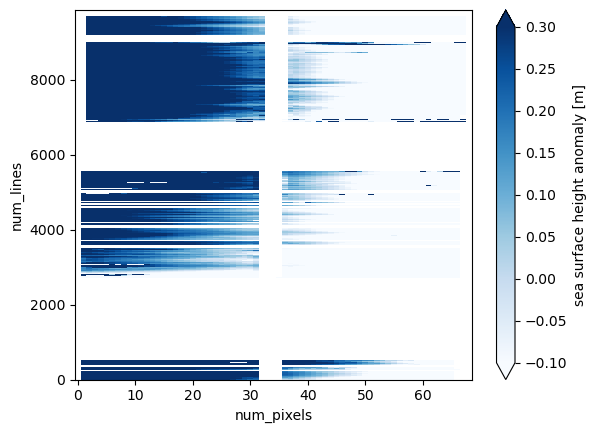

In [6]:
ds.ssha_karin.plot(vmin=-0.1, vmax=0.3, cmap='Blues')

# Healpix me

## Swath width = 120km in ~69pixels

In [7]:
dpix = 120./69
dpix

1.7391304347826086

In [9]:
reload(rs_healpix)
reload(nc_utils)
rs_hp = rs_healpix.RS_Healpix.from_dataset_file(ds_file, 'ssha_karin', resol_km=2.)

In [10]:
rs_hp

<RS_Healpix: nside=2048, resol=0.028629053431811716deg
 file=SWOT_L2_LR_SSH_Expert_028_116_20250207T162718_20250207T171804_PIC2_01.nc, var="ssha_karin">

## Plot

(<GeoAxes: >, <matplotlib.collections.PathCollection at 0x7d95c6d72360>)

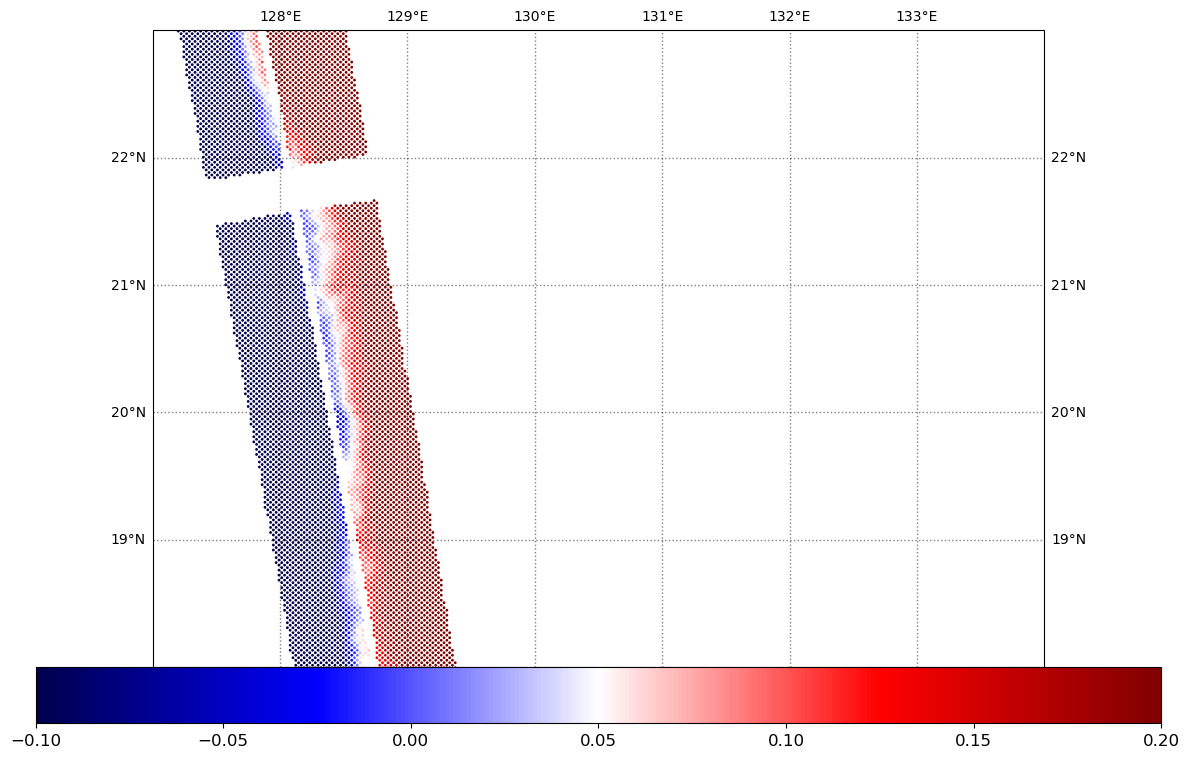

In [13]:
rs_hp.plot(lon_lim=lon_lim, lat_lim=lat_lim, projection='platecarree', vmin=-0.1, vmax=0.2, cmap='seismic')

----

# Try Jinbo's tools

In [ ]:
ds.cro

## Plotting by Michael

In [15]:

def load_and_plot_ssha_data(data,plot_type='error', xlim=(130,135)):
    """
    data is a swot.SSH_L2 instance with Expert input
    
    Returns:
    None
    """

    # Preprocess data
    ssha = data.Expert.ssha_karin_2
    flag = data.Expert.ancillary_surface_classification_flag
    ssha = np.where(flag == 0, ssha, np.nan)
    ssha_err = data.Expert.ssh_karin_uncert
    ssha_err = np.where(flag==0,ssha_err,np.nan)

    lon = data.Expert.longitude.values
    lat = data.Expert.latitude.values
    distance = data.Expert.cross_track_distance.values
    date = data.Expert.time.mean().values
   
    
     

    # plot error on ax[0]
    if plot_type == 'error':
        # Create plots
        fig, ax = plt.subplots(
            figsize=(8, 6),
            ncols=2,
            nrows=1,
            sharex=True,
            sharey=True,
            subplot_kw=dict(projection=ccrs.PlateCarree())
        )
        swot_ssh_utils.plot_a_segment(ax[0],lon,lat,ssha_err,title='SSHA_KaRIn_2 error',vmin=0,vmax=0.005)
        ax[0].set_xlim(xlim)
    
    # Plot original data
    # swot.plot_a_segment(ax[0], lon, lat, ssha, title='SSHA_KaRIn_2 original', vmin=-5, vmax=5)
    
    # Plot Error 

    # Bias correction (optional)
    ssha_1 = swot_ssh_utils.fit_bias(
        ssha, distance,
        order=3, # polynomial to fit
        check_bad_point_threshold=0.1,
        remove_along_track_polynomial=True
    )
    
    # mask out data in nadir and outside of 60km swath width
    distance = np.nanmean(distance, axis=0 )
    msk = (np.abs(distance) < 60e3) & (np.abs(distance) > 10e3)
    lon[:, ~msk] = np.nan
    lat[:, ~msk] = np.nan
    ssha_1[:, ~msk] = np.nan

    # Plot bias corrected data
    swot_ssh_utils.plot_a_segment(ax[1], lon, lat, ssha_1, title='SSHA_KaRIn_2 bias corrected', vmin=-0.1, vmax=0.1)

    

    ax[1].set_xlim(xlim)
    # Save and display plot
    plt.tight_layout()
    fig.suptitle(str(date))

## Do it

In [9]:
lat_bounds = [18, 22]
data=swot_ssh_utils.SSH_L2() 
data.load_data(ds_file,
              lat_bounds=lat_bounds)
display(data.Expert)

<xarray.Dataset> Size: 9MB
Dimensions:                                (num_lines: 225, num_pixels: 69,
                                            num_sides: 2)
Coordinates:
    latitude_nadir                         (num_lines) float64 2kB 22.01 ... ...
    longitude_nadir                        (num_lines) float64 2kB 128.0 ... ...
    latitude                               (num_lines, num_pixels) float64 124kB ...
    longitude                              (num_lines, num_pixels) float64 124kB ...
Dimensions without coordinates: num_lines, num_pixels, num_sides
Data variables: (12/98)
    time                                   (num_lines) datetime64[ns] 2kB ...
    time_tai                               (num_lines) datetime64[ns] 2kB ...
    ssh_karin                              (num_lines, num_pixels) float64 124kB ...
    ssh_karin_qual                         (num_lines, num_pixels) float64 124kB ...
    ssh_karin_uncert                       (num_lines, num_pixels) float64 124kB ...
    ssha_karin                             (num_lines, num_pixels) float64 124kB ...
    ...                                     ...
    swh_ssb_cor_source                     (num_lines, num_pixels) float32 62kB ...
    swh_ssb_cor_source_2                   (num_lines, num_pixels) float32 62kB ...
    wind_speed_ssb_cor_source              (num_lines, num_pixels) float32 62kB ...
    wind_speed_ssb_cor_source_2            (num_lines, num_pixels) float32 62kB ...
    volumetric_correlation                 (num_lines, num_pixels) float64 124kB ...
    volumetric_correlation_uncert          (num_lines, num_pixels) float64 124kB ...
Attributes: (12/62)
    Conventions:                                   CF-1.7
    title:                                         Level 2 Low Rate Sea Surfa...
    institution:                                   CNES
    source:                                        Ka-band radar interferometer
    history:                                       2025-02-09T21:49:32Z : Cre...
    platform:                                      SWOT
    ...                                            ...
    ellipsoid_semi_major_axis:                     6378137.0
    ellipsoid_flattening:                          0.0033528106647474805
    good_ocean_data_percent:                       68.2962355329095
    ssha_variance:                                 0.16054920109683585
    references:                                    V1.3
    equator_longitude:                             131.50

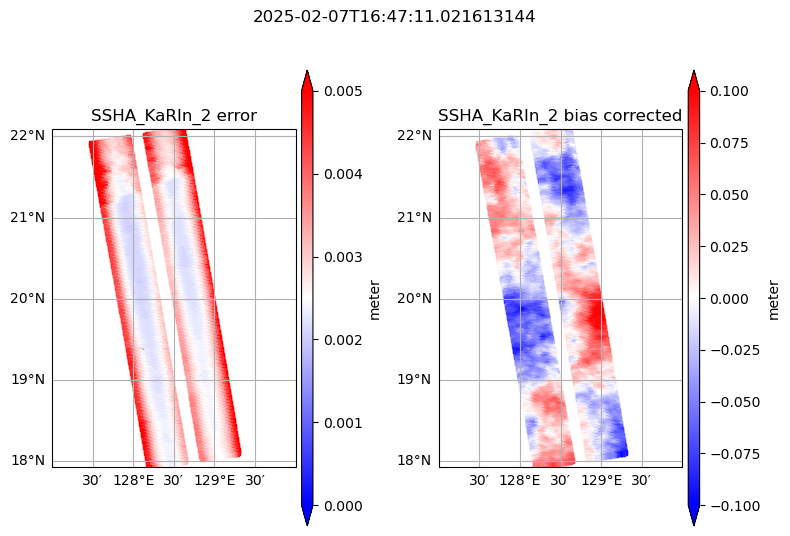

In [16]:
load_and_plot_ssha_data(data, xlim=(127,130))

# Try X's method

In [32]:
reload(swot_ssh_utils)
ds2 = swot_ssh_utils.process_ds(ds, lat_lim=lat_lim)

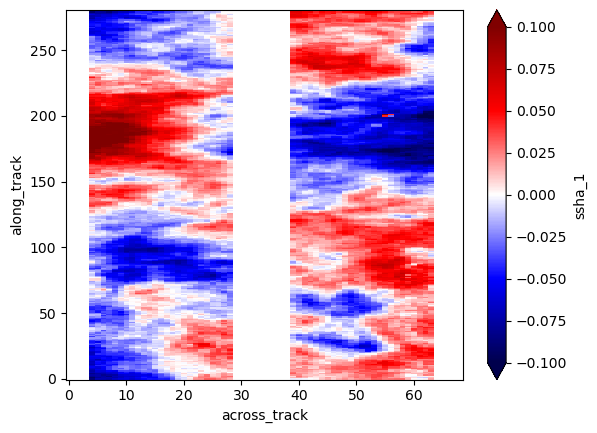

In [33]:
ds2.ssha_1.plot(vmin=-0.1, vmax=0.1, cmap='seismic')

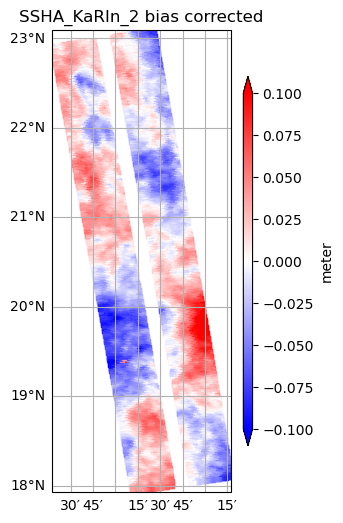

In [38]:
fig, ax = plt.subplots(
            figsize=(8, 6),
            ncols=1,
            nrows=1,
            sharex=True,
            sharey=True,
            subplot_kw=dict(projection=ccrs.PlateCarree())
        )
swot_ssh_utils.plot_a_segment(ax, ds2.longitude.data, ds2.latitude.data, 
                              ds2.ssha_1.data, title='SSHA_KaRIn_2 bias corrected', vmin=-0.1, vmax=0.1)
#plt.show()